# Project 3 Notebook

### Modified by Cassie Moats and Kolya Larson
Last Modified on March 27, 2023

In [2]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 
import astropy.units as u
import astropy.constants as c

## Sodium 5890 and 5896 doublet arises from the 3p - 3s transition:
<img src="http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/imgqua/Nadoub.gif" width="200 pt">


## Solar spectrum is from: http://bass2000.obspm.fr/solar_spect.php

In [3]:
# read in data

spec = astropy.io.ascii.read("solar_spectrum.txt")

Text(0, 0.5, 'Normalized Flux')

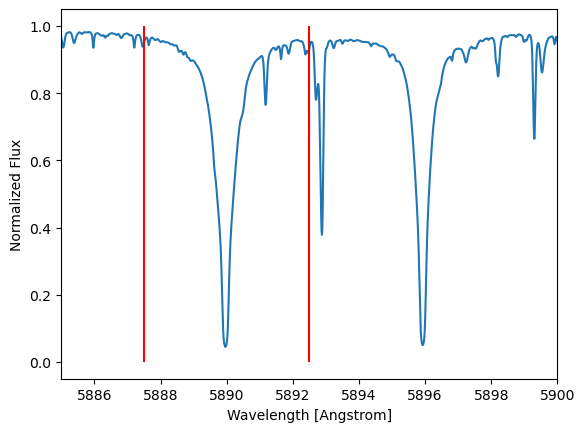

In [4]:
# plot data

plt.plot(spec["col1"], spec["col2"] / 1e4)
# plt.vlines(5887.5, 0, 10000, color="red")
# plt.vlines(5892.5, 0, 10000, color="red")
plt.vlines(5887.5, 0, 1, color="red")
plt.vlines(5892.5, 0, 1, color="red")
plt.xlim(5885, 5900)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

## Equivalent width (ew) is defined as the width of a rectangle with a height equal to that of continuum emission such that the area of the rectangle is equal to the area in the spectral line.

In [5]:
# calculate ew

ind = np.where((spec["col1"] < 5892.5) & (spec["col1"] > 5887.5))
inc = np.median(np.diff(spec["col1"][ind]))
ew = np.sum(1e4 - spec["col2"][ind]) * inc / 1e4
print("equivalent width (ew) = ", ew, " Angstrom")

equivalent width (ew) =  0.8346720000182191  Angstrom


In [6]:
np.log10(0.83 / 5890.0)

-3.8510372024110278

## Now find the number of Na atoms in absorbing state based on the following curve of growth plot:
<img src="http://spiff.rit.edu/classes/phys440/lectures/curve/gcurve.jpg" width="600 pt">

In [7]:
10**14.8 / 0.65 / (5890 / 5000) / 1e14

8.240268309784437

## log(W/$\lambda$) = log(0.83 / 5890) = -3.85, where W is equivalent width.
## The corresponding value on x-axis is log(Nf($\lambda/5000\overset{\circ}{A}$))$\sim$14.8.
## Rearranged, we have N = $8.24\times10^{14}$ with the unit of atoms/cm$^2$, assuming f = 0.65, where f is the oscillator strength for this transition at 5890 $\overset{\circ}{A}$.

## A good tutorial of Boltzmann and Saha equation can be found here: 
http://personal.psu.edu/rbc3/A501/saha.pdf

http://faculty.tamuc.edu/cbertulani/ast/lectures/Lec7.pdf

http://people.physics.tamu.edu/belyanin/astr314/lecture8.pdf

## Questions:
## 1, Estimate the ratio of sodium atoms in the ground state to sodium atoms in excited states using the Boltzmann equation:

## $\frac{N_2}{N_1} = \frac{g_2}{g_1}\exp\left({-\frac{E_2 - E_1}{kT}}\right)$, where subscripts 1 and 2 refer to 3s and 3p states, $N$ is number density, $g$ is the number of separate, individual states that are degenerate in energy, $E$ is energy at the state, $k$ is Boltzmann constant, and $T$ is temperature.

## 2, Estimate the ratio of neutral sodium atoms to ionized sodium atoms. You will use the Saha equation:

## $\frac{Na_{II}}{Na_{I}} = \frac{2kT}{P_e} \frac{Z_{II}}{Z_I} \left(\frac{2\pi m_e kT}{h^2}\right)^{3/2}\exp{\left(-\frac{\chi}{kT}\right)}$, where $m_e$ is electron mass, partition function $Z_I = 2.4$ and  $Z_{II} = 1.0$, electron pressure $P_e = n_e kT = 1.0 N\cdot m^{-2}$, and the ionization energy $\chi = 5.1$ eV. Note that the values given are for the sodium line only. Other lines have different values. 

## 3, Compute the total column density of sodium atoms in the sun's photosphere, assuming the total number of sodium atoms equals to: $N_{1} \times (1+\frac{N_2}{N_1}) \times (1+\frac{Na_{II}}{Na_{I}}$). $N_1$ is measured from the curve of growth. The last two terms have been calculated in question 1 and 2. 

## 4, The column density of hydrogen atoms is about $6.6\times10^{23}$; what is the abundance of sodium relative to hydrogen?

In [11]:
# for question 1

def g_n(n):
    """General equation for g_n from the stellar structure notes given above""" 
        # we ended up not using this equation but it does still hold as an equation
    return 2*(n**2)

g1 = 6 # there are 6 possible 3p states
g2 = 2 # there are 2 possible 3s states

# next need E_1 and E_2

E1 = 0  
E2 = 2.11 # eV - we know E2 is 2.11 greater than E1 from googling about sodium, so can use 0 and the difference 

def gs_to_es(g_2,g_1,E_2, E_1):
    k = 1.380649e-23 * 6.242e+18 # eV/K
    T = 5780 # K - this is Solar Teff
    return (g2/g1*np.exp(-(E2-E1)/(k*T))) 

print("N2/N1:", gs_to_es(g1,g2,E1,E2))
boltzratio = gs_to_es(g1,g2,E1,E2)

k = 1.380649e-23 * 6.242e+18 # eV/K
T = 5780 # K - this is Solar Teff

N2/N1: 0.004822173409315305


In [12]:
# for question 2

# from the ew the number density is 
N1_ew = 8.24e+14
N2 = N1_ew * boltzratio

print('N2:', N2/1e+13, "* 10^13")

NaI = N1_ew + N2 # our neutral state number density

print('calculated neutral state number density:', NaI)

𝜒 = 5.1 * u.eV # eV
P_e = 1.0 * u.N * u.m**(-2)
Z_II = 1
Z_I = 2.4

def na_saha_eq(Z_II,Z_I,𝜒, P_e):
    """Saha equation"""
    k = c.k_B # eV/K
    T = 5780 * u.K # K - this is Solar Teff
    m_e = 9.1e-31 * u.kg # electron mass in - kg
    h = c.h # eV
    
    return ((2*k*T/P_e) * (Z_II/Z_I) * (2*np.pi*m_e*k*T/(h**2))**(3/2) * np.exp(-𝜒/(k*T)))

naii_to_nai = na_saha_eq(Z_II, Z_I, 𝜒, P_e)
naii_nai = naii_to_nai.decompose()
print('Na_II/Na_I:', naii_nai)

NaII = NaI * naii_nai # our number density for the ionized state
print("calculated ionized state number density", NaII)

N2: 0.3973470889275811 * 10^13
calculated neutral state number density: 827973470889275.8
Na_II/Na_I: 2517.9508860465635
calculated ionized state number density 2.0847965346487004e+18


In [13]:
# question 3

total_Na = N1_ew*(1+boltzratio)*(1+naii_nai)
print('total Na:', total_Na)

total Na: 2.0856245081195896e+18


In [14]:
# question 4

total_H = 6.6e+23 # given in example notebook

# physics version
Na_to_H_phys = total_Na / total_H
print("Physics Na/H:", Na_to_H_phys)

# astronomy version
Na_to_H_astro = 12 + np.log10(Na_to_H_phys)
print("Astronomy Na/H:", Na_to_H_astro)

solar_Na = 6.3 # from stellar composition slides 
solar_H = 12
Na_to_H_solar = 10**solar_Na/10**solar_H
print("Physics Na/H for the Sun:", Na_to_H_solar)

# log((N_Na/N_H)/(N_Na/N_H sun) so
Na_to_H_stellar = np.log10(Na_to_H_phys / Na_to_H_solar)
print("Stellar Na/H:", Na_to_H_stellar)

# from the example we also should do the following percent error calculation
# (ratio_ph_sun - ratio_ph) / ratio_ph_sun * 100

print(np.abs(Na_to_H_solar-Na_to_H_phys)/Na_to_H_solar*100)

Physics Na/H: 3.1600371335145295e-06
Astronomy Na/H: 6.4996921860316
Physics Na/H for the Sun: 1.9952623149688787e-06
Stellar Na/H: 0.19969218603160027
58.3770269105603


## In astronomers' term, we set log relative abundance for Hydrogen at 12. Abundances of other elements are expressed as: $12 + log_{10}(N_{element}/N_{H})$, where N is in mole or number density. For example, in solar atmosphere, $N_{He}/N_{H}\sim1/10$ and therefore log abundance for He is $\sim$11. More precisely, 10.93 according to: https://par.nsf.gov/servlets/purl/10036398.  

## Further reading: 
## 1, Formation of Sodium lines in solar spectrum: https://www.chem.uci.edu/~unicorn/249/Handouts/RWFSodium.pdf
## 2, Nomenclature of electron energy levels: https://www.dummies.com/education/science/chemistry/how-to-represent-electrons-in-an-energy-level-diagram/

## https://www.chemicool.com/definition/degenerate.html
 
## Saha equation: https://www.youtube.com/watch?v=MFqrF2izvgs